In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor as rfc

In [3]:
from sklearn.model_selection import GridSearchCV as grid

In [4]:
from datetime import datetime as dt

In [5]:
df = pd.read_csv('coin_Bitcoin.csv')

In [6]:
df = df.sort_values('Date')

In [23]:
data = df.drop(['SNo', 'Name', 'Symbol'], axis = 1)

In [24]:
cols = ['High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap']

In [25]:
for c in cols:
    data['Yesterday\'s '+c] = data.loc[:,c].shift()

In [26]:
data['year'] = data['Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y'))

In [27]:
data.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Yesterday's High,Yesterday's Low,Yesterday's Open,Yesterday's Close,Yesterday's Volume,Yesterday's Marketcap,year
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,NaN,NaN,NaN,NaN,NaN,NaN,2013
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013


In [28]:
data.dropna(axis=0, inplace = True)
data = data.set_index('Date')

In [29]:
data.head()

,High,Low,Open,Close,Volume,Marketcap,Yesterday's High,Yesterday's Low,Yesterday's Open,Yesterday's Close,Yesterday's Volume,Yesterday's Marketcap,year
Date,,,,,,,,,,,,,
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013
2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013


In [115]:
X_train = data[data['year'] < '2021'].drop(['Close','year', 'Marketcap','Yesterday\'s Marketcap' ], axis = 1)
y_train = data[data['year'] < '2021'].Close

In [188]:
X_test = data[data['year'] == '2021'].drop(['Close','year', 'Marketcap','Yesterday\'s Marketcap'], axis = 1)
y_test = data[data['year'] == '2021'].Close

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [85]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [117]:
models = []
models.append(('LR', LinearRegression()))

models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', rfc(n_estimators = 10))) # Ensemble method - collection of many decision trees
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=10)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    


LR: 0.994452 (0.003409)
KNN: -4.951693 (7.699642)
RF: 0.588458 (0.718207)


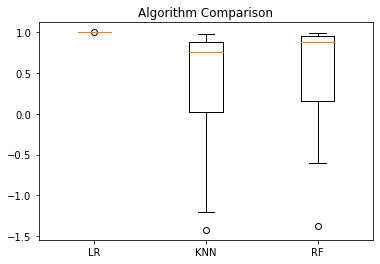

In [90]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [118]:
model = rfc()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,20)]
}

In [119]:
modellr = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [33]:
tss = TimeSeriesSplit(n_splits=8)

In [120]:
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [121]:
search = grid(estimator=modellr, cv=tss, param_grid=params, scoring = rmse_score)

In [122]:
search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [123]:
best_score = search.best_score_
best_model = search.best_estimator_

In [124]:
y_true = y_test.values
y_pred = best_model.predict(X_test)

In [189]:
X_test

,High,Low,Open,Volume,Yesterday's High,Yesterday's Low,Yesterday's Open,Yesterday's Close,Yesterday's Volume
Date,,,,,,,,,
2021-01-01 23:59:59,29600.626950,28803.585014,28994.008916,4.073030e+10,29244.876688,28201.991994,28841.573758,29001.719822,4.675496e+10
2021-01-02 23:59:59,33155.118819,29091.181191,29376.455834,6.786542e+10,29600.626950,28803.585014,28994.008916,29374.151889,4.073030e+10
2021-01-03 23:59:59,34608.556738,32052.317076,32129.407356,7.866524e+10,33155.118819,29091.181191,29376.455834,32127.267939,6.786542e+10
2021-01-04 23:59:59,33440.218569,28722.755271,32810.947644,8.116348e+10,34608.556738,32052.317076,32129.407356,32782.024466,7.866524e+10
2021-01-05 23:59:59,34437.590592,30221.186739,31977.041132,6.754732e+10,33440.218569,28722.755271,32810.947644,31971.913522,8.116348e+10
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,3.872897e+10,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,2.438396e+10,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,2.492431e+10,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10


In [100]:
importance = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [47]:
import seaborn as sns

In [125]:
X_test['pred'] = y_pred

In [126]:
xt = X_test.reset_index()

In [127]:
xt

,Date,High,Low,Open,Volume,Yesterday's High,Yesterday's Low,Yesterday's Open,Yesterday's Close,Yesterday's Volume,pred
0,2021-01-01 23:59:59,29600.626950,28803.585014,28994.008916,4.073030e+10,29244.876688,28201.991994,28841.573758,29001.719822,4.675496e+10,29338.662042
1,2021-01-02 23:59:59,33155.118819,29091.181191,29376.455834,6.786542e+10,29600.626950,28803.585014,28994.008916,29374.151889,4.073030e+10,32299.956070
2,2021-01-03 23:59:59,34608.556738,32052.317076,32129.407356,7.866524e+10,33155.118819,29091.181191,29376.455834,32127.267939,6.786542e+10,34148.336358
3,2021-01-04 23:59:59,33440.218569,28722.755271,32810.947644,8.116348e+10,34608.556738,32052.317076,32129.407356,32782.024466,7.866524e+10,30563.038914
4,2021-01-05 23:59:59,34437.590592,30221.186739,31977.041132,6.754732e+10,33440.218569,28722.755271,32810.947644,31971.913522,8.116348e+10,32800.511353
...,...,...,...,...,...,...,...,...,...,...,...
182,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,3.872897e+10,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,33425.416987
183,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,2.438396e+10,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,34400.577658
184,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,2.492431e+10,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,35507.244898
185,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,2.672155e+10,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,33840.934378


In [128]:
ytrain = y_train.reset_index()
ypred = xt[['Date','pred']]
ytest = y_test.reset_index()

In [129]:
ytrain['Date'] = pd.to_datetime(ytrain['Date'])

In [130]:
ytest['Date'] = pd.to_datetime(ytest['Date'])
ypred['Date'] = pd.to_datetime(ypred['Date'])

C:\Users\JOSHUA~1.OLA\AppData\Local\Temp/ipykernel_3524/1271925583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ypred['Date'] = pd.to_datetime(ypred['Date'])


Text(0.5, 1.0, 'Prediction on Test Data')

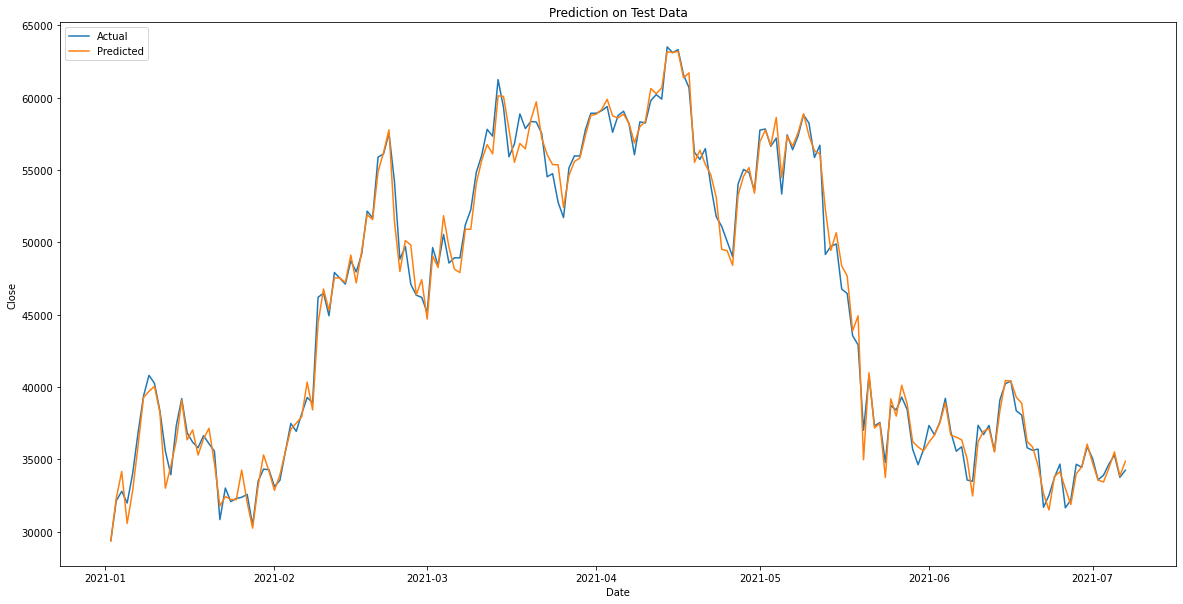

In [209]:
plt.figure(figsize=[20,10])
#sns.lineplot(data=ytrain, x='Date', y='Close')
sns.lineplot(data=ytest, x='Date', y='Close',legend='brief', label='Actual')
sns.lineplot(data=ypred, x='Date', y='pred',legend='brief', label='Predicted')
plt.legend(loc="upper left")
plt.title('Prediction on Test Data')

<AxesSubplot:xlabel='Date', ylabel='pred'>

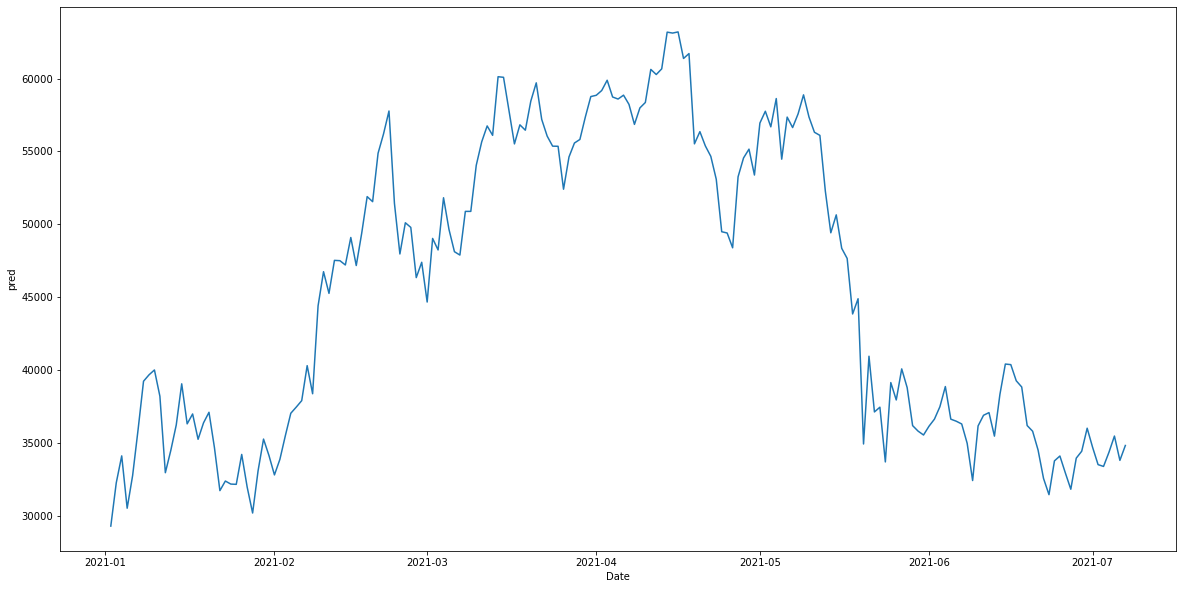

In [132]:
plt.figure(figsize=[20,10])
sns.lineplot(data=ypred, x='Date', y='pred')

In [113]:
mse(y_true,y_pred)

22109.104166530626

In [190]:
newData = pd.read_csv('Bitcoin Historical Data - Investing.com NG.csv')

In [191]:
def nums(x):
    if 'K' in x:
        return float(x[:len(x)-1])*1000
    elif 'M' in x:
        return float(x[:len(x)-1])*1000000
    elif 'B' in x:
        return float(x[:len(x)-1])*1000000000
    else:
        return 0

In [192]:
newData['Volume'] = newData['Volume'].apply(lambda x: nums(x))

In [193]:
newData['Date'] = newData.Date.apply(lambda x: pd.to_datetime(dt.strptime(x,'%b %d, %Y')))

In [194]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    164 non-null    datetime64[ns]
 1   Close   164 non-null    float64       
 2   Open    164 non-null    float64       
 3   High    164 non-null    float64       
 4   Low     164 non-null    float64       
 5   Volume  164 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 7.8 KB


In [195]:
nd = newData.set_index('Date')

In [196]:
for c in ['Close','Open', 'High', 'Low', 'Volume']:
    nd['Yesterday\'s '+c] = nd.loc[:,c].shift()

In [197]:
nd.dropna(axis = 0, inplace=True)

In [198]:
nd_x = nd.drop('Close', axis= 1)
nd_y = nd.Close

In [200]:
nd_true = nd_y.values
nd_pred = best_model.predict(nd_x)

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, Jun 13, 2022 to Jan 01, 2022
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Close               164 non-null    object
 1   Open                164 non-null    object
 2   High                164 non-null    object
 3   Low                 164 non-null    object
 4   Volume              164 non-null    object
 5   Yesterday's Open    163 non-null    object
 6   Yesterday's High    163 non-null    object
 7   Yesterday's Low     163 non-null    object
 8   Yesterday's Volume  163 non-null    object
dtypes: object(9)
memory usage: 16.9+ KB


In [201]:
nd_x['pred'] = nd_pred
ndxt = nd_x.reset_index()

In [204]:
ndy = nd_y.reset_index()
ndpred = ndxt[['Date','pred']]
ndy['Date'] = pd.to_datetime(ndy['Date'])
ndpred['Date'] = pd.to_datetime(ndpred['Date'])

C:\Users\JOSHUA~1.OLA\AppData\Local\Temp/ipykernel_3524/2199500195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndpred['Date'] = pd.to_datetime(ndpred['Date'])


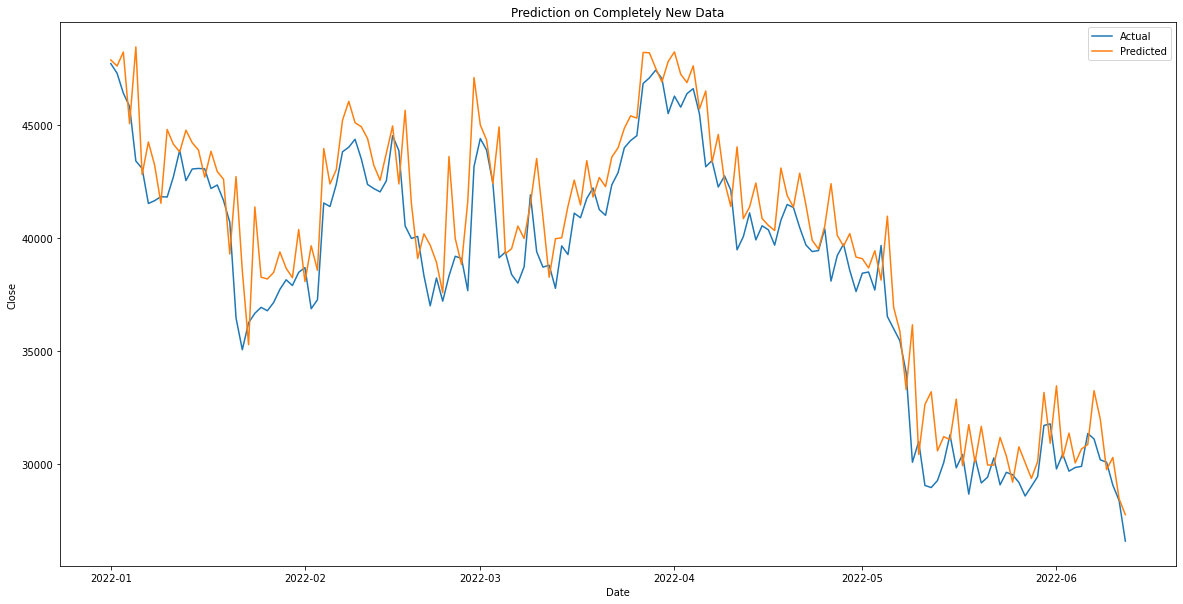

In [212]:
plt.figure(figsize=[20,10])
sns.lineplot(data=ndy, x='Date', y='Close',legend='brief', label='Actual')
sns.lineplot(data=ndpred, x='Date', y='pred',legend='brief', label='Predicted')
plt.title('Prediction on Completely New Data')
plt.legend(loc="upper right")

In [207]:
mse(nd_true,nd_pred)

3932057.163070552